# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [79]:
from bs4 import BeautifulSoup
import requests
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:

agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
headers = {"User-Agent": agent}


In [81]:
base_url = "https://books.toscrape.com/catalogue/category/books_1/index.html"

In [82]:
url = base_url
response = requests.get(url)
soup= BeautifulSoup(response.text, "html.parser")

response.status_code



200

In [83]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    Books | 
     Books to Scrape - Sandbox

</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="
    
" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../../../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../../../static/oscar/css/styles.css" rel="stylesheet" type="

In [84]:

books = soup.find_all('article', class_="product_pod")

books_empty = []
for book in books:
    title = book.find('h3').text
    price = book.find('p', class_="price_color").text.strip()
    price = price.replace("Â£", "")
    books_empty.append({'title': title,
                  'price': float(price)})
    books = books_empty

books

[{'title': 'A Light in the ...', 'price': 51.77},
 {'title': 'Tipping the Velvet', 'price': 53.74},
 {'title': 'Soumission', 'price': 50.1},
 {'title': 'Sharp Objects', 'price': 47.82},
 {'title': 'Sapiens: A Brief History ...', 'price': 54.23},
 {'title': 'The Requiem Red', 'price': 22.65},
 {'title': 'The Dirty Little Secrets ...', 'price': 33.34},
 {'title': 'The Coming Woman: A ...', 'price': 17.93},
 {'title': 'The Boys in the ...', 'price': 22.6},
 {'title': 'The Black Maria', 'price': 52.15},
 {'title': 'Starving Hearts (Triangular Trade ...', 'price': 13.99},
 {'title': "Shakespeare's Sonnets", 'price': 20.66},
 {'title': 'Set Me Free', 'price': 17.46},
 {'title': "Scott Pilgrim's Precious Little ...", 'price': 52.29},
 {'title': 'Rip it Up and ...', 'price': 35.02},
 {'title': 'Our Band Could Be ...', 'price': 57.25},
 {'title': 'Olio', 'price': 23.88},
 {'title': 'Mesaerion: The Best Science ...', 'price': 37.59},
 {'title': 'Libertarianism for Beginners', 'price': 51.33},
 {

In [85]:
datos = [(book['title'], book['price']) for book in books]

In [86]:

df = pd.DataFrame(books)
df

,title,price
0,A Light in the ...,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History ...,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets ...,33.34
7,The Coming Woman: A ...,17.93
8,The Boys in the ...,22.60
9,The Black Maria,52.15


In [87]:
conexion = sqlite3.connect('books.db')
cursor = conexion.cursor()


In [88]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    TITLE TEXT NOT NULL,
    PRICE TEXT NOT NULL)
    """)

In [89]:
cursor.executemany("INSERT INTO BOOKS (TITLE , PRICE) VALUES (? , ?)", datos)

In [90]:
sns.set_theme(style="whitegrid")

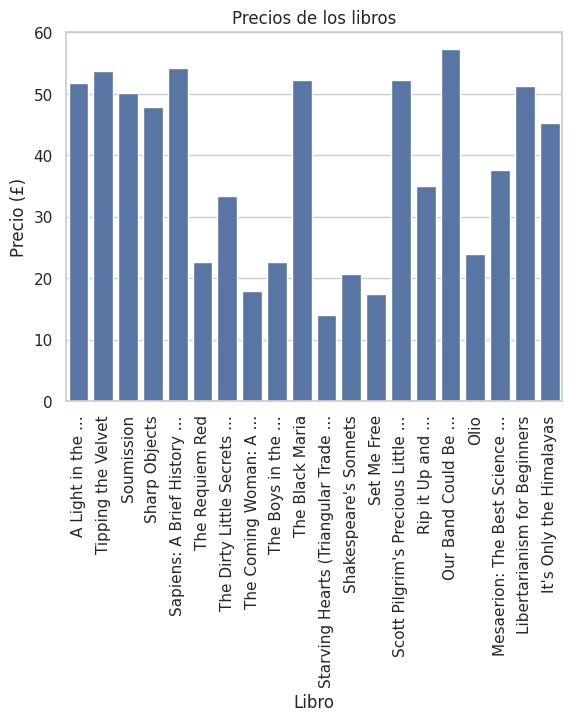

In [100]:
sns.barplot(x= "title", y= "price", data= df)
plt.xticks(rotation= 90)  
plt.title("Precios de los libros")
plt.ylabel("Precio (£)")
plt.xlabel("Libro")
plt.show()

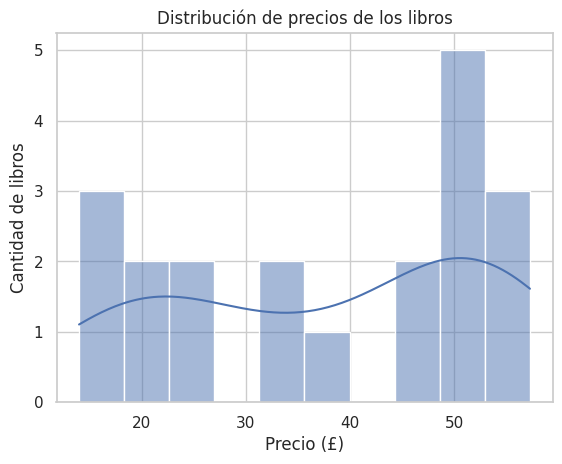

In [93]:
sns.histplot(df["price"], bins= 10, kde= True)
plt.title("Distribución de precios de los libros")
plt.xlabel("Precio (£)")
plt.ylabel("Cantidad de libros")
plt.show()

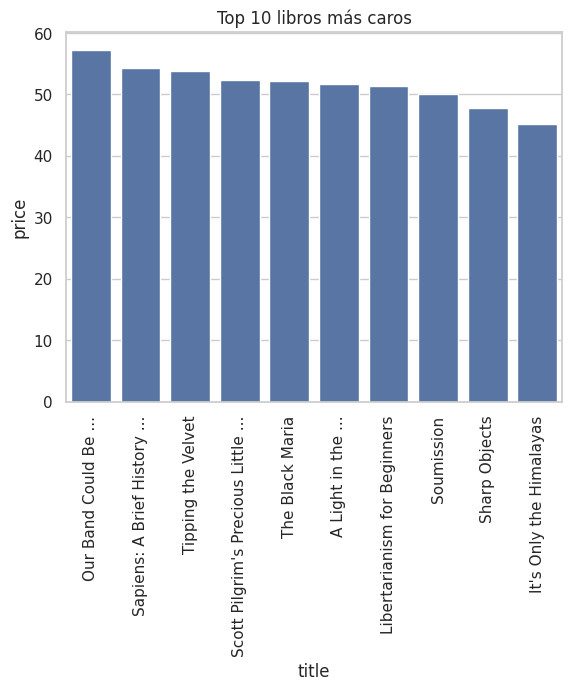

In [97]:
top10 = df.nlargest(10, "price")
sns.barplot(x= "title", y= "price", data= top10)
plt.xticks(rotation= 90)
plt.title("Top 10 libros más caros")
plt.show()

### Correcciones

He corregido el DataFrame, ya que debido a que estaba mal definido, me arrojaba errores visuales de los graficos de matplotlib
tambien al momento de definir el ciclo for, he corregido algunos errores de gramatica, y ordenado un poco mejor el diccionario
A la hora de visualizar he eliminado el argumento figsize ya que creo que al delimitar el grafico, quedaban las barras de manera desordenada y no se podian entender